In [2]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
atletas = pd.read_csv(filepath_or_buffer='atletas2.csv',error_bad_lines=False,verbose=False)

b'Skipping line 30: expected 47 fields, saw 48\nSkipping line 246: expected 47 fields, saw 48\nSkipping line 783: expected 47 fields, saw 48\n'


In [4]:
len(atletas)

825

In [5]:
def polynomial_sframe(feature, degree):

    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x:x**power)
            
    return poly_sframe

## Define constantes utilizadas no projeto

In [6]:
#número da rodada atual
rodada_atual = 12

#frequência de jogo
qtd_min_partidas = (rodada_atual-1) * 0.40

#lista com nome das features de pontuações anteriores
ratings_feature_names = ['R%d' %i for i in range(1,rodada_atual)]


data = atletas[ ['apelido','clube','posicao','ultima_pontuacao'] + ratings_feature_names ].copy()

In [7]:
#remove linhas totalmente em branco (NA em todas as colunas de Ratings)
data = data.dropna()

#calcula média das pontuações de cada jogador
def mean_ratings(row):    
    array = numpy.array(row[ratings_feature_names])
    mean  = numpy.mean(array)    
    return mean

#calcula mediana das pontuações de cada jogador
def median_ratings(row):
    array = numpy.array(row[ratings_feature_names])
    med  = numpy.median(array)    
    return med

#calcula o desvio padrão das pontuações de cada jogador
def std_deviation_ratings(row):    
    array = numpy.array(row[ratings_feature_names])
    std  = numpy.std(array)    
    return std

#calcula a pontuação máxima de um jogador
def max_ratings(row):
    array = numpy.array(row[ratings_feature_names])    
    return numpy.max(array)    

#calcula a pontuação mínima de um jogador
def min_ratings(row):
    array = numpy.array(row[ratings_feature_names])    
    return numpy.min(array)    

#calcula a quantidade de jogos
def count_matches(row):
    qtd=0
    for i in range(1,rodada_atual):
        if ( str( row['R{}'.format(i)] ) != '' ) & ( row['R{}'.format(i)] != 0 ):
            qtd=qtd+1
    return qtd

In [8]:
#computa estatísticas descritivas das pontuações de cada jogador
data['mean'] = data.apply(mean_ratings,axis=1)
data['median'] = data.apply(median_ratings,axis=1)
data['std'] = data.apply(std_deviation_ratings,axis=1)
data['max'] = data.apply(max_ratings,axis=1)
data['min'] = data.apply(min_ratings,axis=1)

#computa quantidade de partidas disputadas (partidas com pontuação != 0)
data['num_matches'] = data.apply(count_matches,axis=1)

#separa apenas os jogadores com frequência mínima de jogos
data = data[data['num_matches']>=qtd_min_partidas]

In [9]:
data.head()

,apelido,clube,posicao,ultima_pontuacao,R1,R2,R3,R4,R5,R6,...,R8,R9,R10,R11,mean,median,std,max,min,num_matches
1,Rodrigo,Ponte Preta,Zagueiro,5.2,0.0,0.0,0.0,10.1,1.1,-0.3,...,4.7,8.0,-3.4,0.0,1.836364,0.0,3.859645,10.1,-3.4,6
2,Betão,Avaí,Zagueiro,10.1,4.3,-0.7,1.0,5.0,1.6,0.9,...,0.0,0.6,5.0,3.1,1.963636,1.0,1.943414,5.0,-0.7,10
3,Jonathan,Atlético-PR,Lateral,1.0,2.5,-0.4,0.4,5.8,0.0,-0.8,...,7.5,6.2,0.0,0.0,2.309091,0.4,2.931476,7.5,-0.8,8
4,Juan,Flamengo,Zagueiro,0.0,0.0,0.0,0.0,7.5,2.6,10.4,...,0.2,-0.8,0.0,0.0,1.809091,0.0,3.514245,10.4,-0.8,5
6,Alecsandro,Coritiba,Atacante,-2.8,0.0,-3.3,0.0,0.0,0.0,2.6,...,-0.1,-2.2,-4.9,0.0,-0.763636,0.0,1.915142,2.6,-4.9,6


## Estatística descritiva dos jogadores por posição

In [10]:
index = ['goleiro','zagueiro','lateral','meia','atacante']
media  = []
desvio = []
minimo = []
maximo = []

goleiros = data[data['posicao']=='Goleiro']
media.append( goleiros['mean'].mean() )
desvio.append( goleiros['mean'].std() )
minimo.append( goleiros['min'].min() )
maximo.append( goleiros['max'].max() )

zagueiros = data[data['posicao']=='Zagueiro']
media.append( zagueiros['mean'].mean() )
desvio.append( zagueiros['mean'].std() )
minimo.append( zagueiros['min'].min() )
maximo.append( zagueiros['max'].max() )

laterais = data[data['posicao']=='Lateral']
media.append( laterais['mean'].mean() )
desvio.append( laterais['mean'].std () )
minimo.append( laterais['min'].min() )
maximo.append( laterais['max'].max() )

meias = data[data['posicao']=='Meia']
media.append( meias['mean'].mean() )
desvio.append( meias['mean'].std() )
minimo.append( meias['min'].min() )
maximo.append( meias['max'].max() )

atacantes = data[data['posicao']=='Atacante']
media.append( atacantes['mean'].mean() )
desvio.append(atacantes['mean'].std())
minimo.append( atacantes['min'].min() )
maximo.append( atacantes['max'].max() )

In [11]:
estatisticas_posicoes = pd.DataFrame( { 'media' : media , 'desvio':desvio , 'min':minimo , 'max':maximo }, index=index )
estatisticas_posicoes

,desvio,max,media,min
goleiro,2.411406,26.7,3.541991,-9.0
zagueiro,1.110227,18.8,2.457834,-4.2
lateral,1.308373,22.8,2.776877,-5.1
meia,1.515967,21.1,2.073440,-7.2
atacante,1.954772,32.1,2.368758,-6.6


## Função para executar regressão linear a partir de um dataset genérico

In [14]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.cross_validation import train_test_split

def linear_regression(dataset,feature_names,target):
    linear_data = dataset[feature_names].copy()
    target = dataset[target]
    k_fold = KFold(n=len(linear_data),n_folds=5)
      
    min_error = 1e15    
    model=None
    
    for train_indices, test_indices in k_fold:
        train_set = numpy.array( linear_data.iloc[train_indices] )
        test_set  = numpy.array( linear_data.iloc[test_indices] )
        
        train_output    = numpy.array( target.iloc[train_indices])
        test_output     = numpy.array( target.iloc[test_indices])
        
        lr = LinearRegression()
        lr.fit(train_set,train_output)
        
        predicted_output = lr.predict(test_set)        
        error = numpy.sum((predicted_output-test_output)**2)
        
        #er2 = r2_score(test_output,predicted_output)
            
        if error < min_error:
            model = lr
            min_error = error
            
    return model


In [15]:
train , test = train_test_split(atacantes, test_size=0.15, random_state=10)

model1 = linear_regression(train,ratings_feature_names,'ultima_pontuacao')

print(model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [196]:
from sklearn.metrics import r2_score

r2_score?

In [16]:
from sklearn.metrics import r2_score

train , test = train_test_split(atacantes, test_size=0.15, random_state=10)

model = linear_regression(train,ratings_feature_names,'ultima_pontuacao')

test_set   = test[ratings_feature_names]
test_array  = numpy.array(test_set)

r2 = r2_score(y_true=test['ultima_pontuacao'],y_pred=model.predict(test_array))

test['y_predicted'] = model.predict(test_array)
test[['ultima_pontuacao','y_predicted']]

#plt.Figure()
#plt.plot( test['ultima_pontuacao'] , test['y_predicted'] , '.')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,ultima_pontuacao,y_predicted
422,0.0,2.430594
38,1.9,-0.571553
181,7.8,4.677581
469,0.0,0.036959
34,0.0,1.281025
82,2.5,4.175259
397,0.0,1.914742
471,3.9,0.143527
559,2.4,-1.172309
608,0.0,0.406909


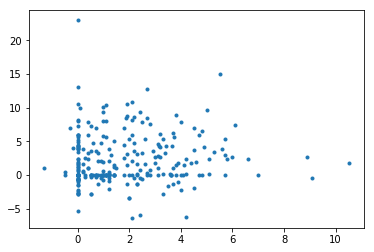

In [17]:
plt.Figure()
plt.plot(data['median'] , data['ultima_pontuacao'] , '.' )
    

In [246]:
gg

,std,mean
clube,,
Atlético-GO,NaN,3.609091
Atlético-MG,NaN,3.281818
Atlético-PR,NaN,0.854545
Avaí,NaN,2.527273
Bahia,NaN,4.472727
Botafogo,NaN,5.918182
Chapecoense,NaN,0.136364
Corinthians,NaN,5.863636
Coritiba,NaN,6.345455


In [197]:
clubes = data[['clube','mean','median','std']].groupby('clube').agg([numpy.mean,numpy.sum])

In [198]:
clubes

mean               median              std           
                 mean        sum      mean    sum      mean        sum
clube                                                                 
Atlético-GO  2.001515  24.018182  1.216667  14.60  3.215441  38.585289
Atlético-MG  2.310413  25.414545  1.062727  11.69  3.347792  36.825716
Atlético-PR  2.146465  19.318182  1.277778  11.50  3.763504  33.871538
Avaí         2.150758  25.809091  1.524167  18.29  2.716169  32.594033
Bahia        3.157273  31.572727  2.180000  21.80  4.146206  41.462058
Botafogo     3.499848  41.998182  2.554167  30.65  3.853762  46.245138
Chapecoense  2.686777  29.554545  1.745455  19.20  3.758637  41.345007
Corinthians  3.615714  50.620000  2.959286  41.43  4.032903  56.460643
Coritiba     3.104156  43.458182  2.175714  30.46  3.421244  47.897413
Cruzeiro     3.421182  34.211818  2.233000  22.33  3.942154  39.421538
Flamengo     3.180818  31.808182  2.052000  20.52  3.940244  39.402442
Fluminense   2.700331  29.703636  2.388182  26.27  3.572663  39.299288
Grêmio       4.101049  53.313636  3.376154  43.89  4.829153  62.778994
Palmeiras    2.822222  25.400000  1.766667  15.90  3.578744  32.208693
Ponte Preta  3.520808  31.687273  3.123333  28.11  3.739728  33.657555
Santos       2.984848  35.818182  2.375000  28.50  4.158652  49.903819
Sport        2.505051  22.545455  1.466667  13.20  3.800113  34.201015
São Paulo    2.956566  26.609091  1.977778  17.80  3.631890  32.687011
Vasco        3.344242  40.130909  2.508333  30.10  3.857227  46.286722
Vitória      1.825758  21.909091  1.050000  12.60  3.010045  36.120535

In [18]:
corinthians = data[((data['clube']=='Corinthians') & (data['mean']!=0))]

In [19]:
corinthians['mean'].mean()

3.2932954545454547

In [20]:
corinthians

,apelido,clube,posicao,ultima_pontuacao,R1,R2,R3,R4,R5,R6,...,R8,R9,R10,R11,mean,median,std,max,min,num_matches
18,Jadson,Corinthians,Meia,5.90,0.6,-0.80,0.80,0.40,-2.00,5.50,...,0.00,-2.90,8.50,-2.90,1.272727,0.40,3.736087,8.50,-2.9,10
50,Fagner,Corinthians,Lateral,0.00,0.0,4.90,5.10,5.00,0.00,0.00,...,1.40,14.40,11.30,1.30,3.945455,1.40,4.695136,14.40,0.0,7
53,Cássio,Corinthians,Goleiro,15.00,-2.0,5.00,7.70,5.00,1.90,-1.00,...,7.70,7.70,16.00,5.50,5.863636,5.50,4.913113,16.00,-2.0,11
93,Rodriguinho,Corinthians,Meia,5.80,6.5,0.60,8.40,7.50,0.00,0.00,...,4.50,1.00,-3.20,5.80,2.827273,1.00,3.650925,8.40,-3.2,8
150,Camacho,Corinthians,Meia,1.70,0.0,0.00,0.00,-0.90,0.00,2.10,...,-0.30,2.90,-0.30,0.50,0.363636,0.00,1.070491,2.90,-0.9,6
183,Jô,Corinthians,Atacante,8.90,6.7,6.00,-0.80,12.40,12.30,2.70,...,0.50,6.90,-3.40,3.80,4.090909,3.80,5.117253,12.40,-3.4,11
458,Maycon,Corinthians,Meia,4.40,0.4,1.80,5.90,0.10,8.70,4.20,...,0.20,-0.10,-0.40,6.90,2.727273,1.80,3.057655,8.70,-0.4,11
473,Marquinhos Gabriel,Corinthians,Meia,0.00,0.0,7.40,0.00,0.00,12.40,4.60,...,0.40,10.10,-1.70,1.10,3.163636,0.50,4.533767,12.40,-1.7,8
492,Pablo,Corinthians,Zagueiro,5.90,0.9,0.00,6.10,6.10,-2.30,0.10,...,4.30,6.20,5.50,4.70,3.563636,4.70,3.131445,7.60,-2.3,10
508,Fábio Carille,Corinthians,Técnico,6.47,2.0,5.41,5.56,5.36,5.14,4.01,...,2.15,6.48,4.83,4.06,4.529091,4.83,1.329029,6.48,2.0,11


In [ ]:
a